In [57]:
import pandas as pd 
import numpy as np
import math
import tensorflow as tf
print(pd.__version__)

1.2.0


## Print Dependencies



Dependences are fundamental to record the computational environment.

In [58]:
%load_ext watermark

# python, ipython, packages, and machine characteristics
%watermark -v -m -p pandas,keras,numpy,math,tensorflow,matplotlib,h5py

# date
print (" ")
%watermark -u -n -t -z

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Python implementation: CPython
Python version       : 3.8.7
IPython version      : 7.18.1

pandas    : 1.2.0
keras     : 2.4.3
numpy     : 1.19.5
math      : unknown
tensorflow: 2.4.0
matplotlib: 3.3.3
h5py      : 2.10.0

Compiler    : Clang 12.0.0 (clang-1200.0.32.28)
OS          : Darwin
Release     : 20.2.0
Machine     : x86_64
Processor   : i386
CPU cores   : 8
Architecture: 64bit

 
Last updated: Tue Jan 26 2021 11:29:17CET



## Load of the data

In [59]:
regen_data = False
# If we keep it as false, it's going to just load the data. If true it's going to regenerate the data again 

In [60]:
if regen_data:
    from process import load_generate_data
    from process import savedata
    regr_data, class_data = load_generate_data(0.1, 5)
    savedata(regr_data, "regression_data-2.csv")
    savedata(class_data, "classification_data-2.csv")

In [61]:
if not regen_data:
    from process import loaddata
    regr_data = loaddata("regression_data-2.csv")
    class_data = loaddata("classification_data-2.csv")

In [62]:
np.random.shuffle(regr_data)
y = regr_data[:,-3:]
x = regr_data[:,:6]

In [63]:
def sigmoid(x):
    return 1./(1 + np.exp(-x))

In [64]:
def inv_sigmoid(y):
    return np.ln(1/y -1)

In [65]:
#x = sigmoid(x)
#y = sigmoid(y)

In [66]:
np.random.shuffle(class_data)
yc = class_data[:,0]
xc = class_data[:,1:]

In [67]:
xc.shape

(124064, 10)

In [68]:
x[0]

array([-0.07047898,  0.1977108 ,  0.0149327 , -0.07014503, -0.01844846,
        0.02172339])

In [69]:
train_split = 0.75
train_limit = int(len(y)*train_split)
print("Training sample: {0} \nValuation sample: {1}".format(train_limit, len(y)-train_limit))

Training sample: 46524 
Valuation sample: 15508


In [70]:
x.shape

(62032, 6)

In [71]:
x_train = x[:train_limit]
x_val = x[train_limit:]

y_train = y[:train_limit]
y_val = y[train_limit:]

## Model Build

In [72]:
from keras.models import Sequential
from keras.layers.core import Dense
import keras.backend as K
from keras import optimizers
from keras import models
from keras import layers

In [73]:
def build_model() :
    model = models.Sequential()
    model.add (layers.Dense (6, activation = "sigmoid" , input_shape = x.shape))
    model.add(layers.Dropout(0.3))
    model.add (layers.Dense (8, activation = "relu"))
    model.add(layers.Dropout(0.3))
    model.add (layers.Dense (3))
    model.compile(optimizer = "rmsprop" , loss = "mse" , metrics =["mae"])
    return model

In [74]:
model = build_model()
history = model.fit ( x_train, y_train, epochs = 100, batch_size = 2032, validation_data = (x_val, y_val) )
model.save("regr.h5")

Epoch 1/100
23/23 [==============================] - 1s 20ms/step - loss: 0.6784 - mae: 0.6954 - val_loss: 0.2581 - val_mae: 0.4718
Epoch 2/100
23/23 [==============================] - 0s 6ms/step - loss: 0.3977 - mae: 0.5240 - val_loss: 0.1455 - val_mae: 0.3528
Epoch 3/100
23/23 [==============================] - 0s 6ms/step - loss: 0.2436 - mae: 0.4042 - val_loss: 0.0729 - val_mae: 0.2497
Epoch 4/100
23/23 [==============================] - 0s 6ms/step - loss: 0.1439 - mae: 0.3074 - val_loss: 0.0323 - val_mae: 0.1641
Epoch 5/100
23/23 [==============================] - 0s 6ms/step - loss: 0.0810 - mae: 0.2302 - val_loss: 0.0115 - val_mae: 0.0943
Epoch 6/100
23/23 [==============================] - 0s 6ms/step - loss: 0.0449 - mae: 0.1739 - val_loss: 0.0028 - val_mae: 0.0431
Epoch 7/100
23/23 [==============================] - 0s 6ms/step - loss: 0.0248 - mae: 0.1325 - val_loss: 0.0017 - val_mae: 0.0333
Epoch 8/100
23/23 [==============================] - 0s 6ms/step - loss: 0.0161 - 

23/23 [==============================] - 0s 7ms/step - loss: 0.0015 - mae: 0.0316 - val_loss: 0.0015 - val_mae: 0.0321
Epoch 56/100
23/23 [==============================] - 0s 7ms/step - loss: 0.0015 - mae: 0.0315 - val_loss: 0.0015 - val_mae: 0.0321
Epoch 57/100
23/23 [==============================] - 0s 7ms/step - loss: 0.0015 - mae: 0.0316 - val_loss: 0.0015 - val_mae: 0.0321
Epoch 58/100
23/23 [==============================] - 0s 7ms/step - loss: 0.0015 - mae: 0.0315 - val_loss: 0.0015 - val_mae: 0.0321
Epoch 59/100
23/23 [==============================] - 0s 7ms/step - loss: 0.0015 - mae: 0.0316 - val_loss: 0.0015 - val_mae: 0.0321
Epoch 60/100
23/23 [==============================] - 0s 5ms/step - loss: 0.0014 - mae: 0.0315 - val_loss: 0.0015 - val_mae: 0.0321
Epoch 61/100
23/23 [==============================] - 0s 7ms/step - loss: 0.0014 - mae: 0.0315 - val_loss: 0.0015 - val_mae: 0.0321
Epoch 62/100
23/23 [==============================] - 0s 8ms/step - loss: 0.0015 - mae: 0

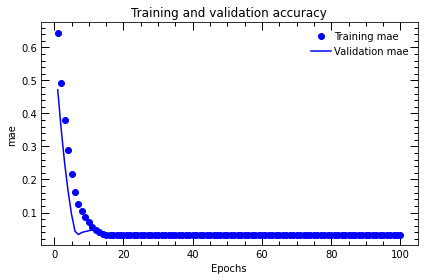

In [75]:
import matplotlib.pyplot as plt

mae = history.history['mae']
val_mae = history.history['val_mae']

epochs = range(1, len(mae) + 1)

plt.plot(epochs, mae, 'bo', label='Training mae')
plt.plot(epochs, val_mae, 'b', label='Validation mae')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.legend()

plt.show()

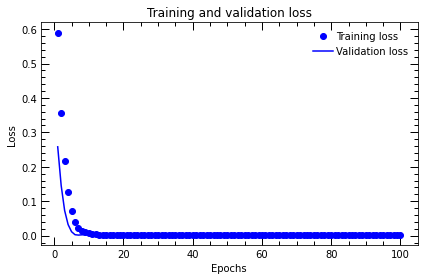

In [76]:
plt.clf()   # clear figure

loss = history.history['loss']
val_loss = history.history['val_loss']



plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## !! 
The dropout 0.2 seems to work better

In [130]:
def build_model() :
    model = models.Sequential()
    model.add (layers.Dense (12, activation = "relu", kernel_initializer="normal" , input_shape = x.shape))
    model.add (layers.Dropout(0.2))
    model.add (layers.Dense (24, activation = "relu"))
    model.add (layers.Dropout(0.2))
    model.add (layers.Dense (48, activation = "relu"))
    model.add (layers.Dropout(0.2))
    model.add (layers.Dense (24, activation = "relu"))
    model.add (layers.Dropout(0.2))
    model.add (layers.Dense (12, activation = "relu"))
    model.add (layers.Dropout(0.2))
    model.add (layers.Dense (12, activation = "relu"))
    model.add (layers.Dropout(0.2))
    model.add (layers.Dense (3))
    model.compile(optimizer = "rmsprop" , loss = "mse" , metrics =["mae"])
    return model

In [143]:
model = build_model ()
history = model.fit ( x_train, y_train, epochs = 20, batch_size = 256, validation_data = (x_val, y_val) )
model.save("regr.h5")

Epoch 1/20
182/182 [==============================] - 2s 4ms/step - loss: 0.0014 - mae: 0.0305 - val_loss: 7.4834e-04 - val_mae: 0.0224
Epoch 2/20
182/182 [==============================] - 1s 3ms/step - loss: 9.9645e-04 - mae: 0.0257 - val_loss: 7.0378e-04 - val_mae: 0.0220
Epoch 3/20
182/182 [==============================] - 1s 3ms/step - loss: 9.1814e-04 - mae: 0.0247 - val_loss: 6.8872e-04 - val_mae: 0.0217
Epoch 4/20
182/182 [==============================] - 1s 3ms/step - loss: 8.5898e-04 - mae: 0.0239 - val_loss: 6.4119e-04 - val_mae: 0.0210
Epoch 5/20
182/182 [==============================] - 1s 3ms/step - loss: 8.2966e-04 - mae: 0.0235 - val_loss: 6.7689e-04 - val_mae: 0.0215
Epoch 6/20
182/182 [==============================] - 1s 3ms/step - loss: 8.0564e-04 - mae: 0.0232 - val_loss: 7.0460e-04 - val_mae: 0.0219
Epoch 7/20
182/182 [==============================] - 1s 3ms/step - loss: 7.9535e-04 - mae: 0.0230 - val_loss: 6.2446e-04 - val_mae: 0.0207
Epoch 8/20
182/182 [====

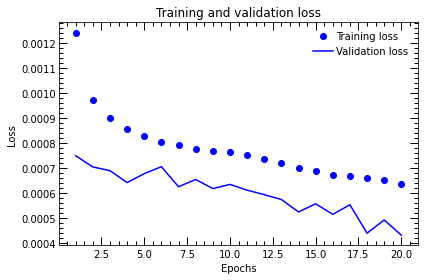

In [144]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

loss = history.history['loss']
val_loss = history.history['val_loss']



plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Test spectrum

In [111]:
from tensorflow import keras
model_regr = keras.models.load_model('regr.h5')
model_class = keras.models.load_model('class.h5')

In [112]:
def energy_spectrum(energy_array, bins):
    energy_array = np.array(energy_array)
    plt.hist(energy_array, bins, histtype=u'step')
    plt.yscale("log")
    plt.show()

In [113]:
final_p = []
final_e = []

for regr_pair in regr_data:
    final_e.append(np.linalg.norm(regr_pair[10:13]))
    final_p.append(np.linalg.norm(regr_pair[13:16]))

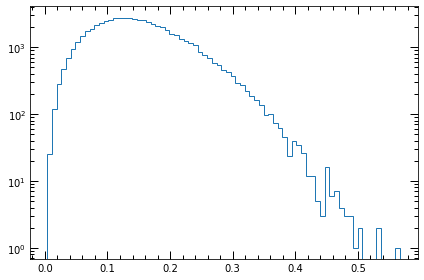

In [114]:
energy_spectrum(final_e, 75)

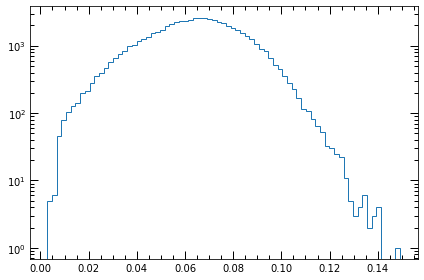

In [115]:
energy_spectrum(final_p, 75)

In [116]:
x.shape

(62032, 6)

In [117]:
x[0]

array([-0.07047898,  0.1977108 ,  0.0149327 , -0.07014503, -0.01844846,
        0.02172339])

In [133]:
from tensorflow import keras 
photon_final_nn = []
threshold = 0.5
num = 1000
for i, x_ in enumerate(xc[:num]):
    if i%100 == 0:
        print("{}%".format(i/len(xc[:num]) * 100))
    x_ = np.array([x_])
    classification = model_class.predict(np.stack(x_))
    if classification >= threshold:
        regr_x = np.array([x_[0,:6]])
        regr_result = model_regr.predict(regr_x)
        photon_final_nn.append(np.linalg.norm(regr_result[0]))

0.0%
10.0%
20.0%
30.0%
40.0%
50.0%
60.0%
70.0%
80.0%
90.0%


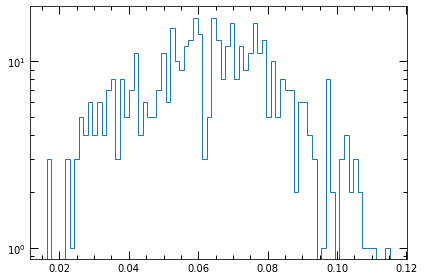

In [134]:
energy_spectrum(photon_final_nn, 75)

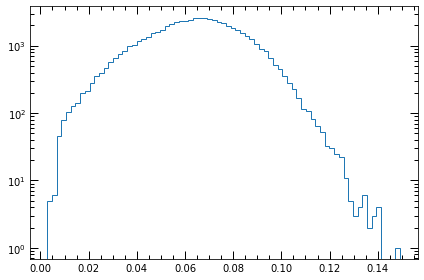

In [135]:
energy_spectrum(final_p, 75)

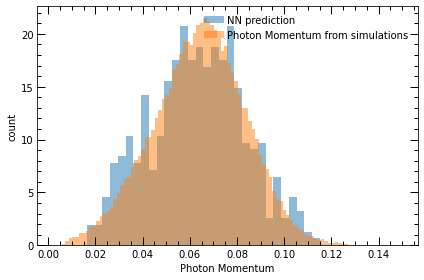

In [141]:
# fixed bin size
#bins = np.arange(0., 100, 100) 

plt.hist(photon_final_nn, 30, alpha=0.5, label='NN prediction', density = True)
plt.hist(final_p, 100, alpha=0.5, label='Photon Momentum from simulations', density = True)
plt.xlabel('Photon Momentum')
plt.ylabel('count')
plt.legend(loc='upper right')
#plt.xlim((0, 0.25))
#plt.ylim((0, 1000))
plt.show()

<ipython-input-142-ab16d2c86326>:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


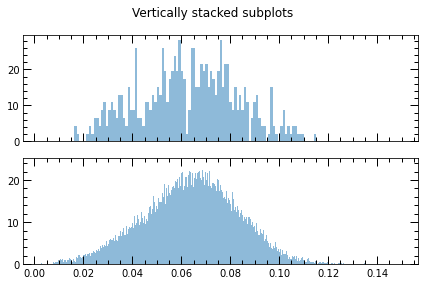

In [142]:
fig, axs = plt.subplots(2, sharex = True)
fig.suptitle('Vertically stacked subplots')
axs[0].hist(photon_final_nn, 100, alpha=0.5, label='NN prediction', density = True)
axs[1].hist(final_p, 1000, alpha=0.5, label='Photon Momentum from simulations', density = True)
fig.show()